# Imports

In [1]:
import museval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
accuracy = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0]
names = [['conv-tasnet', 'epoch_200'], ['demucs', 'epoch_280'], ['htdemucs', 'epoch_280']]
length_s = "4s"

sdrs_list = []
accuracies_list = []
for n in names:
    sdrs = []
    
    for t in accuracy:
        
        df = pd.read_csv(f"D:/Github/phd-drum-sep/rebuttal_experiments/{n[0]}/results_{n[1]}_{t}_drop/results.csv")
        results = museval.EvalStore(frames_agg='median', tracks_agg='median')
        results.df = df
        sdrs.append(results.agg_frames_tracks_scores()['drums']['SDR'])

    sdrs_list.append(sdrs)
    accuracies_list.append(accuracy)


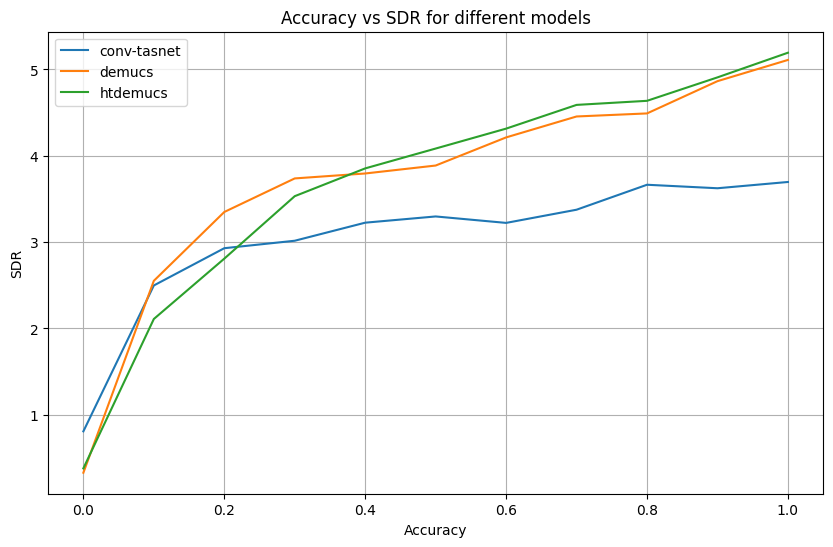

In [3]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot each model's data
for i, name in enumerate(names):
    plt.plot(accuracy, sdrs_list[i], label=f"{name[0]}")

# Adding labels and title
plt.xlabel('Accuracy')
plt.ylabel('SDR')
plt.title('Accuracy vs SDR for different models')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

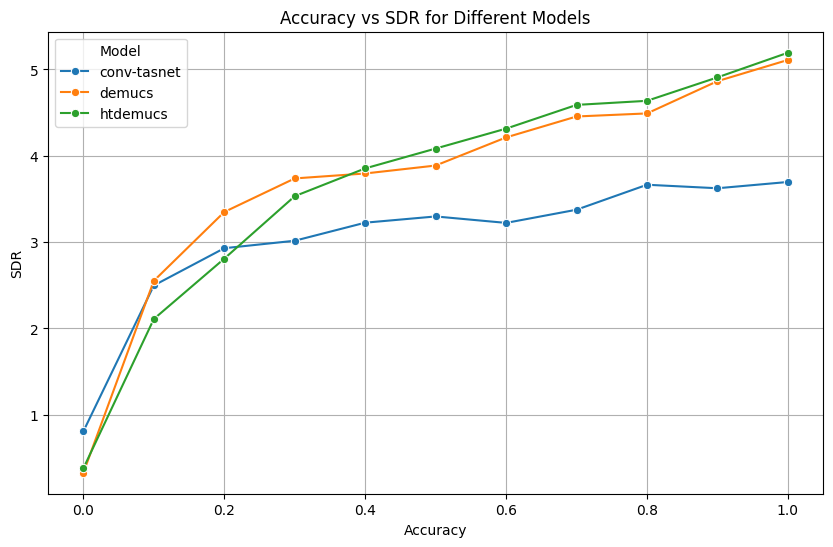

In [4]:
import seaborn as sns

# Creating a DataFrame for plotting
data = {
    'Accuracy': accuracy * len(names),
    'SDR': sdrs_list[0] + sdrs_list[1] + sdrs_list[2],
    'Model': ['conv-tasnet'] * len(accuracy) + ['demucs'] * len(accuracy) + ['htdemucs'] * len(accuracy)
}
df = pd.DataFrame(data)

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Accuracy', y='SDR', hue='Model', marker='o')

# Adding labels and title
plt.xlabel('Accuracy')
plt.ylabel('SDR')
plt.title('Accuracy vs SDR for Different Models')
plt.grid(True)

# Show plot